In [1]:
#Loading up modules

import os, cv2, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import datetime

<center><font size="+2">Importing and splitting the data into validation set</font></center>

In [2]:
test_for_sub = pd.read_csv('sample_submission.csv')

In [3]:
test_dir = 'C:/Users/zachw/test/'
train_dir = 'C:/Users/zachw/train/'

#resize to 64x64x3

rows = 64
cols = 64
channels = 3

train_images = [train_dir+i for i in os.listdir(train_dir)]
test_images = [test_dir+i for i in os.listdir(test_dir)]

#shuffle train_images to break out validation set

random.Random(42).shuffle(train_images)

#function to read in images

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (rows, cols), interpolation=cv2.INTER_CUBIC)

#function to prepare the data

def prep_data(images):
    count = len(images)
    data = np.ndarray((count, rows, cols, channels), dtype=np.uint8)
    
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image
        if i%250 == 0: print('Processed {} of {}'.format(i, count))
            
    return data



start = datetime.datetime.now()

train = prep_data(train_images)

end = datetime.datetime.now()
print('Training data took: ', end-start,' to process')

start = datetime.datetime.now()

test = prep_data(test_images)

end = datetime.datetime.now()
print('Test data took: ', end-start,' to process')

Processed 0 of 25000
Processed 250 of 25000
Processed 500 of 25000
Processed 750 of 25000
Processed 1000 of 25000
Processed 1250 of 25000
Processed 1500 of 25000
Processed 1750 of 25000
Processed 2000 of 25000
Processed 2250 of 25000
Processed 2500 of 25000
Processed 2750 of 25000
Processed 3000 of 25000
Processed 3250 of 25000
Processed 3500 of 25000
Processed 3750 of 25000
Processed 4000 of 25000
Processed 4250 of 25000
Processed 4500 of 25000
Processed 4750 of 25000
Processed 5000 of 25000
Processed 5250 of 25000
Processed 5500 of 25000
Processed 5750 of 25000
Processed 6000 of 25000
Processed 6250 of 25000
Processed 6500 of 25000
Processed 6750 of 25000
Processed 7000 of 25000
Processed 7250 of 25000
Processed 7500 of 25000
Processed 7750 of 25000
Processed 8000 of 25000
Processed 8250 of 25000
Processed 8500 of 25000
Processed 8750 of 25000
Processed 9000 of 25000
Processed 9250 of 25000
Processed 9500 of 25000
Processed 9750 of 25000
Processed 10000 of 25000
Processed 10250 of 25

In [4]:
train.shape

(25000, 64, 64, 3)

In [5]:
test.shape

(12500, 64, 64, 3)

In [6]:
train_images

['C:/Users/zachw/train/dog.11242.jpg',
 'C:/Users/zachw/train/cat.7312.jpg',
 'C:/Users/zachw/train/cat.9636.jpg',
 'C:/Users/zachw/train/dog.11240.jpg',
 'C:/Users/zachw/train/cat.4628.jpg',
 'C:/Users/zachw/train/cat.9274.jpg',
 'C:/Users/zachw/train/dog.12325.jpg',
 'C:/Users/zachw/train/cat.357.jpg',
 'C:/Users/zachw/train/dog.5740.jpg',
 'C:/Users/zachw/train/cat.9245.jpg',
 'C:/Users/zachw/train/dog.4539.jpg',
 'C:/Users/zachw/train/dog.9103.jpg',
 'C:/Users/zachw/train/cat.12347.jpg',
 'C:/Users/zachw/train/cat.646.jpg',
 'C:/Users/zachw/train/dog.6639.jpg',
 'C:/Users/zachw/train/cat.1871.jpg',
 'C:/Users/zachw/train/dog.11852.jpg',
 'C:/Users/zachw/train/dog.5481.jpg',
 'C:/Users/zachw/train/dog.1573.jpg',
 'C:/Users/zachw/train/dog.337.jpg',
 'C:/Users/zachw/train/dog.7938.jpg',
 'C:/Users/zachw/train/cat.5964.jpg',
 'C:/Users/zachw/train/cat.7752.jpg',
 'C:/Users/zachw/train/cat.996.jpg',
 'C:/Users/zachw/train/dog.3830.jpg',
 'C:/Users/zachw/train/cat.6121.jpg',
 'C:/Users/

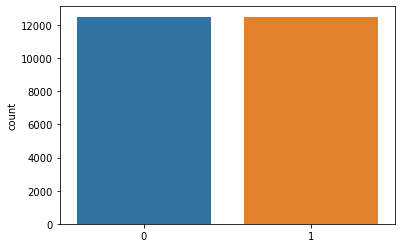

In [7]:
#creating labels, 1 if dog, 0 if cat

labels=[]
for i in train_images:
    if 'dog' in i:
        labels.append(1)
    else:
        labels.append(0)
        
sns.countplot(labels)

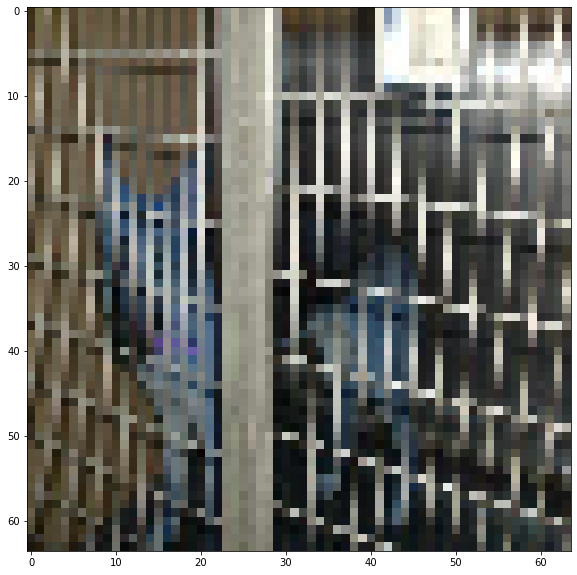

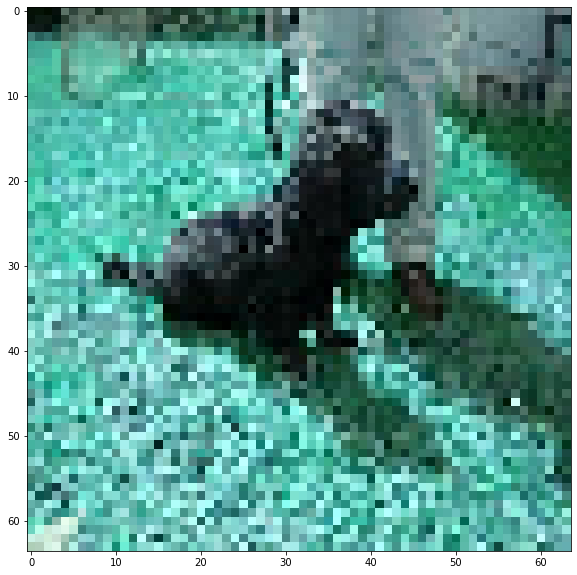

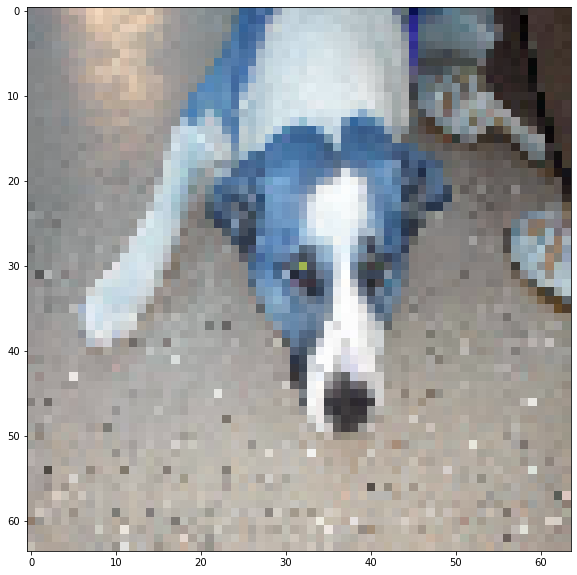

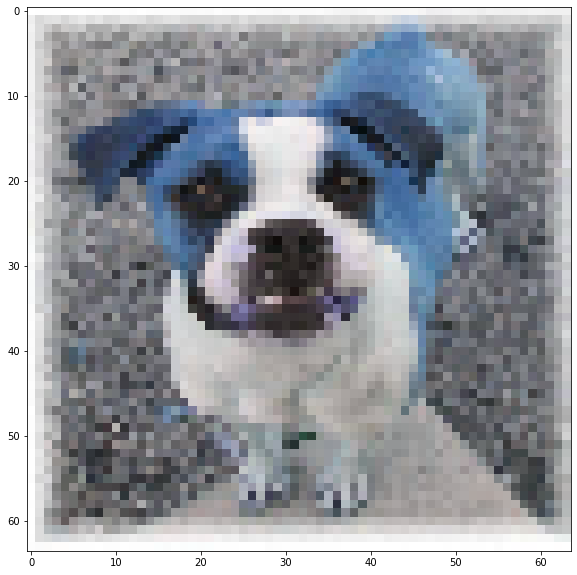

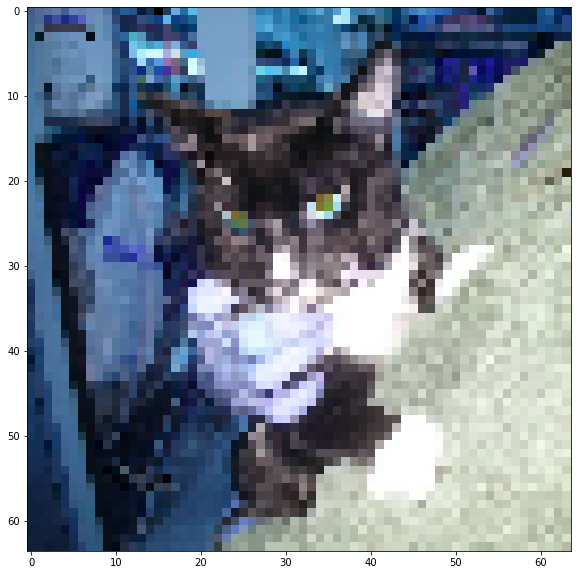

In [8]:
#showing random images

def show_image(idx):
    image = read_image(train_images[idx])
    plt.figure(figsize=(15,10))
    plt.imshow(image)
    plt.show()
    
sample1 = np.int_(np.random.uniform(low=0, high=25000, size=(5,)))
    
for idx in sample1:
    show_image(idx)    

In [9]:
#converting labels to array

labels = np.array(labels)

<center><font size="+2">Creating CNN #1</font></center>

In [10]:
#building the layers

model1 = keras.models.Sequential([
    
    keras.layers.Convolution2D(32, 3, 3, activation="relu", padding="same", 
                               input_shape=[rows, cols, 3]),
    keras.layers.Convolution2D(32, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(64, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(64, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(128, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(128, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(256, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(256, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
    
])

In [11]:
#setting optimzer and loss function and early callback

optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
loss = 'binary_crossentropy'
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [12]:
#compiling model

model1.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])

In [13]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history = model1.fit(train, labels, epochs=50, validation_split=0.25, shuffle=True, callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/50
586/586 [==============================] - 9s 15ms/step - loss: 0.6932 - accuracy: 0.5029 - val_loss: 0.6929 - val_accuracy: 0.4973
Epoch 2/50
586/586 [==============================] - 7s 12ms/step - loss: 0.6928 - accuracy: 0.5096 - val_loss: 0.6913 - val_accuracy: 0.5741
Epoch 3/50
586/586 [==============================] - 7s 13ms/step - loss: 0.6914 - accuracy: 0.5342 - val_loss: 0.6854 - val_accuracy: 0.5867
Epoch 4/50
586/586 [==============================] - 8s 13ms/step - loss: 0.6838 - accuracy: 0.5752 - val_loss: 0.6660 - val_accuracy: 0.6016
Epoch 5/50
586/586 [==============================] - 7s 13ms/step - loss: 0.6646 - accuracy: 0.6036 - val_loss: 0.6551 - val_accuracy: 0.6115
Epoch 6/50
586/586 [==============================] - 7s 13ms/step - loss: 0.6458 - accuracy: 0.6369 - val_loss: 0.6206 - val_accuracy: 0.6651
Epoch 7/50
586/586 [==============================] - 7s 13ms/step - loss: 0.6258 - accuracy: 0.6619 - val_loss: 0.6437 - val_accuracy: 0.6354

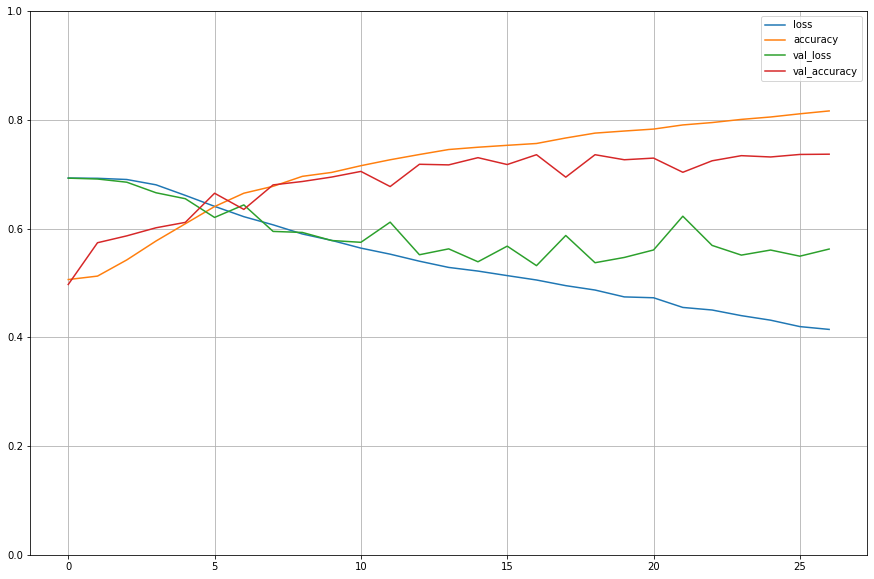

In [14]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
predictions1 = model1.predict(test)

In [161]:
df1 = pd.DataFrame({
        'id':test_for_sub['id'],
        'label': predictions1[:,0]
         })

df1.to_csv('submission1.csv', index=False)

<center><font size="+2">Creating CNN #2</font></center>

In [ ]:
#doubling the number of filters per layer

In [163]:
#building the layers

model2 = keras.models.Sequential([
    
    keras.layers.Convolution2D(64, 3, 3, activation="relu", padding="same", 
                               input_shape=[rows, cols, 3]),
    keras.layers.Convolution2D(64, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(128, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(128, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(256, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(256, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(512, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(512, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
    
])

In [164]:
#setting optimzer and loss function and early callback

optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
loss = 'binary_crossentropy'
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [165]:
#compiling model

model2.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])

In [166]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history = model2.fit(train, labels, epochs=50, validation_split=0.25, shuffle=True, callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/50
586/586 [==============================] - 134s 228ms/step - loss: 0.6930 - accuracy: 0.5018 - val_loss: 0.6927 - val_accuracy: 0.4971
Epoch 2/50
586/586 [==============================] - 131s 223ms/step - loss: 0.6923 - accuracy: 0.5224 - val_loss: 0.6901 - val_accuracy: 0.5718
Epoch 3/50
586/586 [==============================] - 136s 232ms/step - loss: 0.6897 - accuracy: 0.5553 - val_loss: 0.6811 - val_accuracy: 0.5963
Epoch 4/50
586/586 [==============================] - 128s 218ms/step - loss: 0.6803 - accuracy: 0.5834 - val_loss: 0.6486 - val_accuracy: 0.6400
Epoch 5/50
586/586 [==============================] - 129s 221ms/step - loss: 0.6578 - accuracy: 0.6156 - val_loss: 0.6507 - val_accuracy: 0.6136
Epoch 6/50
586/586 [==============================] - 131s 223ms/step - loss: 0.6255 - accuracy: 0.6600 - val_loss: 0.6301 - val_accuracy: 0.6496
Epoch 7/50
586/586 [==============================] - 132s 226ms/step - loss: 0.6080 - accuracy: 0.6750 - val_loss: 0.5797 -

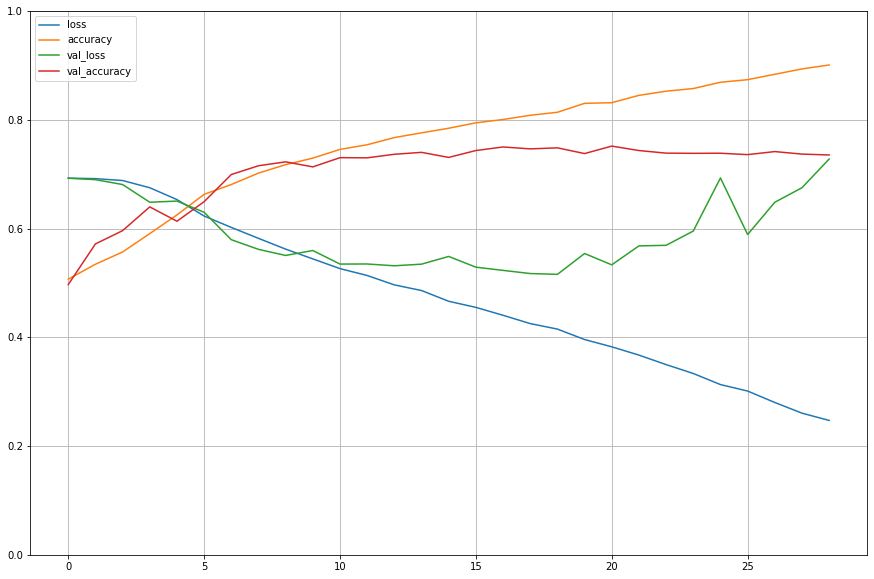

In [168]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [169]:
predictions2 = model2.predict(test)

In [170]:
df2 = pd.DataFrame({
        'id':test_for_sub['id'],
        'label': predictions2[:,0]
         })

df2.to_csv('submission2.csv', index=False)

In [21]:
test2_dir = 'C:/Users/zachw/test_2/'

In [42]:
test2_images = [test2_dir+i for i in os.listdir(test2_dir)]

In [43]:
test2 = prep_data(test2_images)

Processed 0 of 1


In [44]:
#using a picture of my friends dog on the model
predictions2_new = model1.predict(test2)

In [45]:
if predictions2_new[0,0] >= 0.5:
    print('I am {:.2%} sure this is a Dog'.format(predictions2_new[0][0]))
else:
    print('I am {:.2%} sure this is a Cat'.format(1-predictions2_new[0][0]))

I am 80.12% sure this is a Dog


<center><font size="+2">Creating CNN #3</font></center>

In [ ]:
#adding more layers including batch normalization

In [182]:
#building the layers

model3 = keras.models.Sequential([
    
    keras.layers.Convolution2D(32, 3, 3, activation="relu", padding="same", 
                               input_shape=[rows, cols, 3]),
    keras.layers.Convolution2D(32, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(64, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(64, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(128, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(128, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(256, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(256, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(512, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(512, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
    
])

In [183]:
#setting optimzer and loss function and early callback

optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
loss = 'binary_crossentropy'
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [184]:
#compiling model

model3.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])

In [185]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history = model3.fit(train, labels, epochs=50, validation_split=0.25, shuffle=True, callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/50
586/586 [==============================] - 129s 218ms/step - loss: 0.8046 - accuracy: 0.5002 - val_loss: 0.7119 - val_accuracy: 0.5045
Epoch 2/50
586/586 [==============================] - 126s 215ms/step - loss: 0.7172 - accuracy: 0.5187 - val_loss: 0.6586 - val_accuracy: 0.6182
Epoch 3/50
586/586 [==============================] - 128s 218ms/step - loss: 0.6509 - accuracy: 0.6276 - val_loss: 0.6136 - val_accuracy: 0.6621
Epoch 4/50
586/586 [==============================] - 143s 244ms/step - loss: 0.6057 - accuracy: 0.6742 - val_loss: 0.9409 - val_accuracy: 0.5509
Epoch 5/50
586/586 [==============================] - 143s 245ms/step - loss: 0.5922 - accuracy: 0.6874 - val_loss: 0.6403 - val_accuracy: 0.6509
Epoch 6/50
586/586 [==============================] - 137s 234ms/step - loss: 0.5749 - accuracy: 0.7045 - val_loss: 0.6865 - val_accuracy: 0.5989
Epoch 7/50
586/586 [==============================] - 136s 232ms/step - loss: 0.5580 - accuracy: 0.7179 - val_loss: 0.6136 -

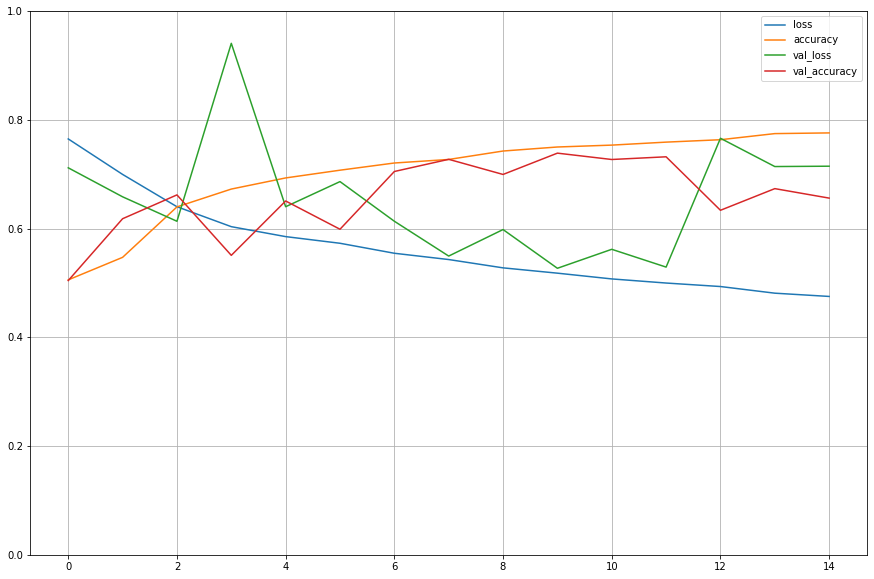

In [186]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [187]:
predictions3 = model3.predict(test)

In [188]:
df3 = pd.DataFrame({
        'id':test_for_sub['id'],
        'label': predictions3[:,0]
         })

df3.to_csv('submission3.csv', index=False)

<center><font size="+2">Creating CNN #4</font></center>

In [ ]:
#adding more dense functions

In [206]:
#building the layers

model4 = keras.models.Sequential([
    
    keras.layers.Convolution2D(32, 3, 3, activation="relu", padding="same", 
                               input_shape=[rows, cols, 3]),
    keras.layers.Convolution2D(32, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(64, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(64, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(128, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(128, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(256, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(256, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(512, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(512, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
    
])

In [207]:
#setting optimzer and loss function and early callback

optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
loss = 'binary_crossentropy'
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [208]:
#compiling model

model4.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])

In [209]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history = model4.fit(train, labels, epochs=50, validation_split=0.25, shuffle=True, callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/50
586/586 [==============================] - 159s 268ms/step - loss: 0.8128 - accuracy: 0.4957 - val_loss: 0.7043 - val_accuracy: 0.4942
Epoch 2/50
586/586 [==============================] - 160s 273ms/step - loss: 0.7205 - accuracy: 0.5075 - val_loss: 0.6989 - val_accuracy: 0.5267
Epoch 3/50
586/586 [==============================] - 163s 279ms/step - loss: 0.7026 - accuracy: 0.5254 - val_loss: 0.6897 - val_accuracy: 0.5275
Epoch 4/50
586/586 [==============================] - 159s 271ms/step - loss: 0.6916 - accuracy: 0.5505 - val_loss: 0.6967 - val_accuracy: 0.5302
Epoch 5/50
586/586 [==============================] - 144s 246ms/step - loss: 0.6753 - accuracy: 0.5897 - val_loss: 0.6408 - val_accuracy: 0.6293
Epoch 6/50
586/586 [==============================] - 146s 249ms/step - loss: 0.6388 - accuracy: 0.6467 - val_loss: 0.6741 - val_accuracy: 0.6208
Epoch 7/50
586/586 [==============================] - 151s 258ms/step - loss: 0.6085 - accuracy: 0.6756 - val_loss: 0.6992 -

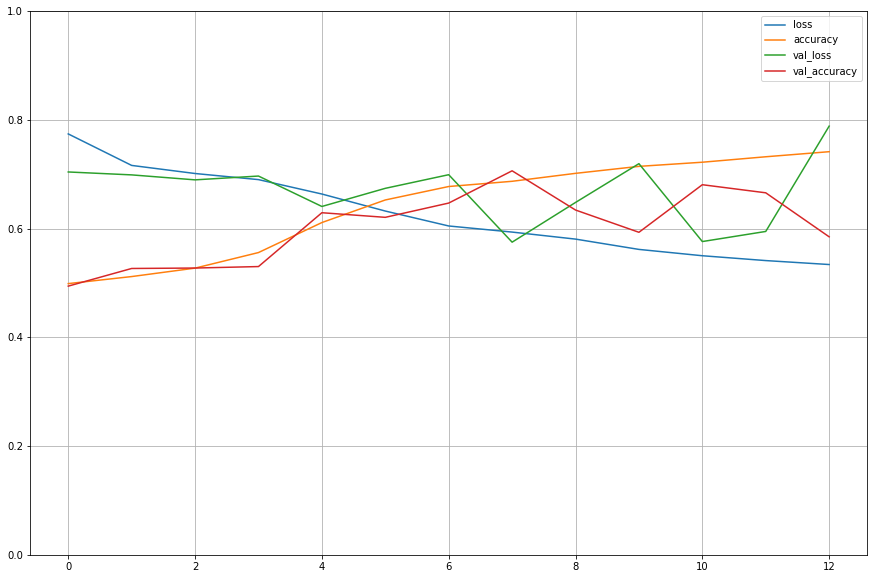

In [210]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [211]:
predictions4 = model4.predict(test)

In [212]:
df4 = pd.DataFrame({
        'id':test_for_sub['id'],
        'label': predictions4[:,0]
         })

df4.to_csv('submission4.csv', index=False)

<center><font size="+2">Creating CNN #5</font></center>

In [ ]:
#Took the best model from the previous four and trying a adam optimizer

In [217]:
#building the layers

model5 = keras.models.Sequential([
    
    keras.layers.Convolution2D(32, 3, 3, activation="relu", padding="same", 
                               input_shape=[rows, cols, 3]),
    keras.layers.Convolution2D(32, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(64, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(64, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(128, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(128, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(256, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(256, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    keras.layers.Convolution2D(512, 3, 3, activation="relu", padding="same"),
    keras.layers.Convolution2D(512, 3, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(pool_size=(2,2), padding="same"),
    
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
    
])

In [218]:
#setting optimzer and loss function and early callback

optimizer = keras.optimizers.Adam()
loss = 'binary_crossentropy'
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [219]:
#compiling model

model5.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])

In [220]:
#fitting the model and tracking how long it takes

start = datetime.datetime.now()

history = model5.fit(train, labels, epochs=50, validation_split=0.1, shuffle=True, callbacks=[early_stopping_cb])

end = datetime.datetime.now()

print("Total Time: ", end-start)

Epoch 1/50
704/704 [==============================] - 185s 259ms/step - loss: 0.7924 - accuracy: 0.5129 - val_loss: 0.8442 - val_accuracy: 0.4864
Epoch 2/50
704/704 [==============================] - 181s 258ms/step - loss: 0.7019 - accuracy: 0.5429 - val_loss: 0.7112 - val_accuracy: 0.5388
Epoch 3/50
704/704 [==============================] - 183s 260ms/step - loss: 0.7004 - accuracy: 0.5283 - val_loss: 0.7021 - val_accuracy: 0.5068
Epoch 4/50
704/704 [==============================] - 181s 257ms/step - loss: 0.6855 - accuracy: 0.5569 - val_loss: 0.7099 - val_accuracy: 0.5416
Epoch 5/50
704/704 [==============================] - 181s 258ms/step - loss: 0.6800 - accuracy: 0.5739 - val_loss: 0.6566 - val_accuracy: 0.6052
Epoch 6/50
704/704 [==============================] - 182s 259ms/step - loss: 0.6325 - accuracy: 0.6456 - val_loss: 0.7901 - val_accuracy: 0.5992
Epoch 7/50
704/704 [==============================] - 181s 258ms/step - loss: 0.5796 - accuracy: 0.6966 - val_loss: 0.7091 -

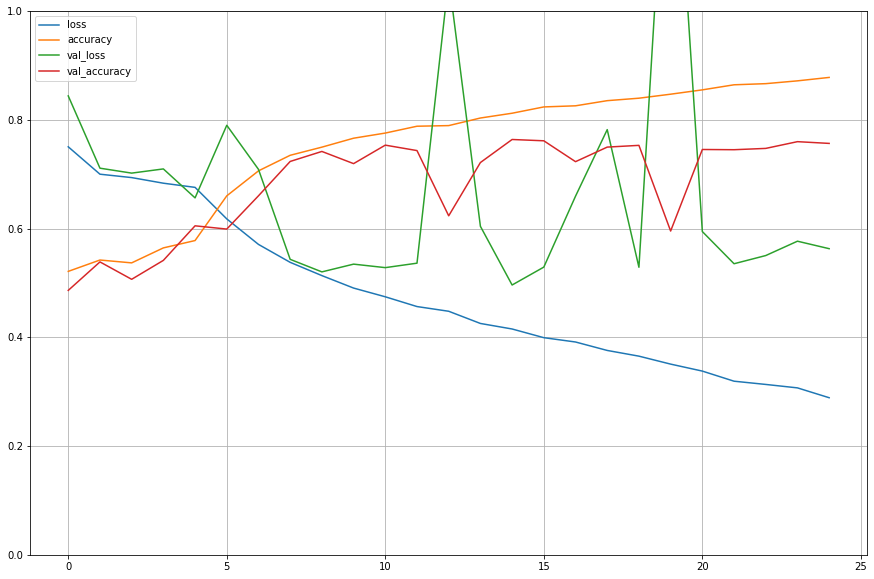

In [221]:
pd.DataFrame(history.history).plot(figsize=(15,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [222]:
predictions5 = model5.predict(test)

In [223]:
df5 = pd.DataFrame({
        'id':test_for_sub['id'],
        'label': predictions5[:,0]
         })

df5.to_csv('submission5.csv', index=False)